# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 18 vs Chr 18q10

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 6

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_18': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-2L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-4L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\ch

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_18': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-2L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-3L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_18', 'chr_18_q10_isochromosome'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  6
chr_18
   Train: 
        181228-i(18)(q10)+18-10L.bmp
        181228-i(18)(q10)+18-11L.bmp
        181228-i(18)(q10)+18-12L.bmp
        181228-i(18)(q10)+18-13L.bmp
        181228-i(18)(q10)+18-14L.bmp
        181228-i(18)(q10)+18-1L.bmp
        181228-i(18)(q10)+18-2L.bmp
        181228-i(18)(q10)+18-4L.bmp
        181228-i(18)(q10)+18-5L.bmp
        181228-i(18)(q10)+18-7L.bmp
        181228-i(18)(q10)+18-8L.bmp
        181228-i(18)(q10)+18-9L.bmp
        183873-del(18)(p11)-10L.bmp
        183873-del(18)(p11)-11L.bmp
        183873-del(18)(p11)-12L.bmp
        183873-del(18)(p11)-13L.bmp
        183873-del(18)(p11)-14L.bmp
        183873-del(18)(p11)-15L.bmp
        183873-del(18)(p11)-16L.bmp
        183873-del(18)(p11)-18L.bmp
        183873-del(18)(p11)-19L.bmp
        183873-del(18)(p11)-1L.bmp
        183873-del(18)(p11)-20L.bmp
        183873-del(18)(p11)-22L.bmp
        183873-del(18)(p11)-23L.bmp
        183873-del(18)(p11)-24L.bmp
        183873-del(18)(p1

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [12]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [13]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [16]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [17]:
chromConvert = {
               'chr_18': 0, 
               'chr_18_q10_isochromosome': 1
               }

In [18]:
chromConvert_reverse = {
                0: 'chr_18',
                1: 'chr_18_q10_isochromosome',
               }

In [19]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [20]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [21]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1])

In [23]:
len(X_train)

178

In [24]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [25]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [28]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [29]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
start = time.time()

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=800, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/800
3/3 [==============================] - 6s 1s/step - loss: 1396.7728 - accuracy: 0.5674 - val_loss: 1080.1577 - val_accuracy: 0.1379
Epoch 2/800
3/3 [==============================] - 0s 162ms/step - loss: 454.2654 - accuracy: 0.5674 - val_loss: 14.9051 - val_accuracy: 0.8621
Epoch 3/800
3/3 [==============================] - 0s 149ms/step - loss: 6.0242 - accuracy: 0.6124 - val_loss: 0.2633 - val_accuracy: 0.8621
Epoch 4/800
3/3 [==============================] - 0s 144ms/step - loss: 0.1354 - accuracy: 0.9157 - val_loss: 0.0591 - val_accuracy: 1.0000
Epoch 5/800
3/3 [==============================] - 0s 136ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 6/800
3/3 [==============================] - 0s 135ms/step - loss: 6.2413e-04 - accuracy: 1.0000 - val_loss: 6.6793e-04 - val_accuracy: 1.0000
Epoch 7/800
3/3 [==============================] - 0s 141ms/step - loss: 5.8519e-05 - accuracy: 1.0000 - val_loss: 1.9705e-04 - val_accuracy

3/3 [==============================] - 0s 145ms/step - loss: 3.6633e-07 - accuracy: 1.0000 - val_loss: 3.7133e-05 - val_accuracy: 1.0000
Epoch 58/800
3/3 [==============================] - 0s 149ms/step - loss: 4.5673e-07 - accuracy: 1.0000 - val_loss: 4.1292e-05 - val_accuracy: 1.0000
Epoch 59/800
3/3 [==============================] - 0s 136ms/step - loss: 4.8620e-07 - accuracy: 1.0000 - val_loss: 4.5253e-05 - val_accuracy: 1.0000
Epoch 60/800
3/3 [==============================] - 0s 137ms/step - loss: 5.6053e-07 - accuracy: 1.0000 - val_loss: 4.8717e-05 - val_accuracy: 1.0000
Epoch 61/800
3/3 [==============================] - 0s 150ms/step - loss: 5.7526e-07 - accuracy: 1.0000 - val_loss: 5.1490e-05 - val_accuracy: 1.0000
Epoch 62/800
3/3 [==============================] - 0s 146ms/step - loss: 5.8330e-07 - accuracy: 1.0000 - val_loss: 5.3602e-05 - val_accuracy: 1.0000
Epoch 63/800
3/3 [==============================] - 0s 152ms/step - loss: 5.8062e-07 - accuracy: 1.0000 - val_los

3/3 [==============================] - 0s 150ms/step - loss: 2.0292e-07 - accuracy: 1.0000 - val_loss: 5.3767e-05 - val_accuracy: 1.0000
Epoch 112/800
3/3 [==============================] - 0s 151ms/step - loss: 2.0225e-07 - accuracy: 1.0000 - val_loss: 5.3676e-05 - val_accuracy: 1.0000
Epoch 113/800
3/3 [==============================] - 0s 138ms/step - loss: 1.9957e-07 - accuracy: 1.0000 - val_loss: 5.3590e-05 - val_accuracy: 1.0000
Epoch 114/800
3/3 [==============================] - 0s 150ms/step - loss: 1.9823e-07 - accuracy: 1.0000 - val_loss: 5.3504e-05 - val_accuracy: 1.0000
Epoch 115/800
3/3 [==============================] - 0s 151ms/step - loss: 1.9690e-07 - accuracy: 1.0000 - val_loss: 5.3422e-05 - val_accuracy: 1.0000
Epoch 116/800
3/3 [==============================] - 0s 140ms/step - loss: 1.9489e-07 - accuracy: 1.0000 - val_loss: 5.3331e-05 - val_accuracy: 1.0000
Epoch 117/800
3/3 [==============================] - 0s 149ms/step - loss: 1.9355e-07 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 138ms/step - loss: 1.4533e-07 - accuracy: 1.0000 - val_loss: 4.9633e-05 - val_accuracy: 1.0000
Epoch 166/800
3/3 [==============================] - 0s 138ms/step - loss: 1.4399e-07 - accuracy: 1.0000 - val_loss: 4.9568e-05 - val_accuracy: 1.0000
Epoch 167/800
3/3 [==============================] - 0s 145ms/step - loss: 1.4332e-07 - accuracy: 1.0000 - val_loss: 4.9498e-05 - val_accuracy: 1.0000
Epoch 168/800
3/3 [==============================] - 0s 141ms/step - loss: 1.4265e-07 - accuracy: 1.0000 - val_loss: 4.9440e-05 - val_accuracy: 1.0000
Epoch 169/800
3/3 [==============================] - 0s 146ms/step - loss: 1.4265e-07 - accuracy: 1.0000 - val_loss: 4.9375e-05 - val_accuracy: 1.0000
Epoch 170/800
3/3 [==============================] - 0s 137ms/step - loss: 1.4198e-07 - accuracy: 1.0000 - val_loss: 4.9305e-05 - val_accuracy: 1.0000
Epoch 171/800
3/3 [==============================] - 0s 140ms/step - loss: 1.4198e-07 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 150ms/step - loss: 1.1854e-07 - accuracy: 1.0000 - val_loss: 4.6363e-05 - val_accuracy: 1.0000
Epoch 220/800
3/3 [==============================] - 0s 138ms/step - loss: 1.1787e-07 - accuracy: 1.0000 - val_loss: 4.6301e-05 - val_accuracy: 1.0000
Epoch 221/800
3/3 [==============================] - 0s 134ms/step - loss: 1.1720e-07 - accuracy: 1.0000 - val_loss: 4.6248e-05 - val_accuracy: 1.0000
Epoch 222/800
3/3 [==============================] - 0s 150ms/step - loss: 1.1720e-07 - accuracy: 1.0000 - val_loss: 4.6186e-05 - val_accuracy: 1.0000
Epoch 223/800
3/3 [==============================] - 0s 137ms/step - loss: 1.1653e-07 - accuracy: 1.0000 - val_loss: 4.6133e-05 - val_accuracy: 1.0000
Epoch 224/800
3/3 [==============================] - 0s 144ms/step - loss: 1.1653e-07 - accuracy: 1.0000 - val_loss: 4.6083e-05 - val_accuracy: 1.0000
Epoch 225/800
3/3 [==============================] - 0s 145ms/step - loss: 1.1586e-07 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 145ms/step - loss: 1.0180e-07 - accuracy: 1.0000 - val_loss: 4.3417e-05 - val_accuracy: 1.0000
Epoch 274/800
3/3 [==============================] - 0s 145ms/step - loss: 1.0180e-07 - accuracy: 1.0000 - val_loss: 4.3367e-05 - val_accuracy: 1.0000
Epoch 275/800
3/3 [==============================] - 0s 150ms/step - loss: 1.0180e-07 - accuracy: 1.0000 - val_loss: 4.3314e-05 - val_accuracy: 1.0000
Epoch 276/800
3/3 [==============================] - 0s 146ms/step - loss: 1.0180e-07 - accuracy: 1.0000 - val_loss: 4.3261e-05 - val_accuracy: 1.0000
Epoch 277/800
3/3 [==============================] - 0s 139ms/step - loss: 1.0113e-07 - accuracy: 1.0000 - val_loss: 4.3203e-05 - val_accuracy: 1.0000
Epoch 278/800
3/3 [==============================] - 0s 147ms/step - loss: 9.9787e-08 - accuracy: 1.0000 - val_loss: 4.3154e-05 - val_accuracy: 1.0000
Epoch 279/800
3/3 [==============================] - 0s 147ms/step - loss: 9.9787e-08 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 140ms/step - loss: 8.9072e-08 - accuracy: 1.0000 - val_loss: 4.0680e-05 - val_accuracy: 1.0000
Epoch 328/800
3/3 [==============================] - 0s 148ms/step - loss: 8.9072e-08 - accuracy: 1.0000 - val_loss: 4.0631e-05 - val_accuracy: 1.0000
Epoch 329/800
3/3 [==============================] - 0s 141ms/step - loss: 8.8402e-08 - accuracy: 1.0000 - val_loss: 4.0590e-05 - val_accuracy: 1.0000
Epoch 330/800
3/3 [==============================] - 0s 148ms/step - loss: 8.8402e-08 - accuracy: 1.0000 - val_loss: 4.0549e-05 - val_accuracy: 1.0000
Epoch 331/800
3/3 [==============================] - 0s 144ms/step - loss: 8.8402e-08 - accuracy: 1.0000 - val_loss: 4.0499e-05 - val_accuracy: 1.0000
Epoch 332/800
3/3 [==============================] - 0s 151ms/step - loss: 8.8402e-08 - accuracy: 1.0000 - val_loss: 4.0450e-05 - val_accuracy: 1.0000
Epoch 333/800
3/3 [==============================] - 0s 138ms/step - loss: 8.8402e-08 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 138ms/step - loss: 7.8357e-08 - accuracy: 1.0000 - val_loss: 3.8202e-05 - val_accuracy: 1.0000
Epoch 382/800
3/3 [==============================] - 0s 141ms/step - loss: 7.7687e-08 - accuracy: 1.0000 - val_loss: 3.8161e-05 - val_accuracy: 1.0000
Epoch 383/800
3/3 [==============================] - 0s 172ms/step - loss: 7.7687e-08 - accuracy: 1.0000 - val_loss: 3.8120e-05 - val_accuracy: 1.0000
Epoch 384/800
3/3 [==============================] - 0s 150ms/step - loss: 7.7687e-08 - accuracy: 1.0000 - val_loss: 3.8079e-05 - val_accuracy: 1.0000
Epoch 385/800
3/3 [==============================] - 0s 146ms/step - loss: 7.7017e-08 - accuracy: 1.0000 - val_loss: 3.8042e-05 - val_accuracy: 1.0000
Epoch 386/800
3/3 [==============================] - 0s 144ms/step - loss: 7.7017e-08 - accuracy: 1.0000 - val_loss: 3.7997e-05 - val_accuracy: 1.0000
Epoch 387/800
3/3 [==============================] - 0s 141ms/step - loss: 7.7017e-08 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 136ms/step - loss: 6.9650e-08 - accuracy: 1.0000 - val_loss: 3.5872e-05 - val_accuracy: 1.0000
Epoch 436/800
3/3 [==============================] - 0s 145ms/step - loss: 6.9650e-08 - accuracy: 1.0000 - val_loss: 3.5835e-05 - val_accuracy: 1.0000
Epoch 437/800
3/3 [==============================] - 0s 140ms/step - loss: 6.9650e-08 - accuracy: 1.0000 - val_loss: 3.5786e-05 - val_accuracy: 1.0000
Epoch 438/800
3/3 [==============================] - 0s 149ms/step - loss: 6.9650e-08 - accuracy: 1.0000 - val_loss: 3.5745e-05 - val_accuracy: 1.0000
Epoch 439/800
3/3 [==============================] - 0s 149ms/step - loss: 6.9650e-08 - accuracy: 1.0000 - val_loss: 3.5700e-05 - val_accuracy: 1.0000
Epoch 440/800
3/3 [==============================] - 0s 141ms/step - loss: 6.9650e-08 - accuracy: 1.0000 - val_loss: 3.5654e-05 - val_accuracy: 1.0000
Epoch 441/800
3/3 [==============================] - 0s 145ms/step - loss: 6.8981e-08 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 141ms/step - loss: 6.3623e-08 - accuracy: 1.0000 - val_loss: 3.3879e-05 - val_accuracy: 1.0000
Epoch 490/800
3/3 [==============================] - 0s 149ms/step - loss: 6.3623e-08 - accuracy: 1.0000 - val_loss: 3.3846e-05 - val_accuracy: 1.0000
Epoch 491/800
3/3 [==============================] - 0s 155ms/step - loss: 6.2953e-08 - accuracy: 1.0000 - val_loss: 3.3813e-05 - val_accuracy: 1.0000
Epoch 492/800
3/3 [==============================] - 0s 142ms/step - loss: 6.2283e-08 - accuracy: 1.0000 - val_loss: 3.3780e-05 - val_accuracy: 1.0000
Epoch 493/800
3/3 [==============================] - 0s 146ms/step - loss: 6.2283e-08 - accuracy: 1.0000 - val_loss: 3.3739e-05 - val_accuracy: 1.0000
Epoch 494/800
3/3 [==============================] - 0s 141ms/step - loss: 6.2283e-08 - accuracy: 1.0000 - val_loss: 3.3702e-05 - val_accuracy: 1.0000
Epoch 495/800
3/3 [==============================] - 0s 144ms/step - loss: 6.1614e-08 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 148ms/step - loss: 5.4917e-08 - accuracy: 1.0000 - val_loss: 3.2104e-05 - val_accuracy: 1.0000
Epoch 544/800
3/3 [==============================] - 0s 153ms/step - loss: 5.4917e-08 - accuracy: 1.0000 - val_loss: 3.2071e-05 - val_accuracy: 1.0000
Epoch 545/800
3/3 [==============================] - 0s 148ms/step - loss: 5.4917e-08 - accuracy: 1.0000 - val_loss: 3.2038e-05 - val_accuracy: 1.0000
Epoch 546/800
3/3 [==============================] - 0s 148ms/step - loss: 5.4917e-08 - accuracy: 1.0000 - val_loss: 3.2005e-05 - val_accuracy: 1.0000
Epoch 547/800
3/3 [==============================] - 0s 136ms/step - loss: 5.4917e-08 - accuracy: 1.0000 - val_loss: 3.1976e-05 - val_accuracy: 1.0000
Epoch 548/800
3/3 [==============================] - 0s 151ms/step - loss: 5.4917e-08 - accuracy: 1.0000 - val_loss: 3.1944e-05 - val_accuracy: 1.0000
Epoch 549/800
3/3 [==============================] - 0s 144ms/step - loss: 5.4917e-08 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 150ms/step - loss: 4.8889e-08 - accuracy: 1.0000 - val_loss: 3.0439e-05 - val_accuracy: 1.0000
Epoch 598/800
3/3 [==============================] - 0s 147ms/step - loss: 4.8219e-08 - accuracy: 1.0000 - val_loss: 3.0411e-05 - val_accuracy: 1.0000
Epoch 599/800
3/3 [==============================] - 0s 144ms/step - loss: 4.8219e-08 - accuracy: 1.0000 - val_loss: 3.0378e-05 - val_accuracy: 1.0000
Epoch 600/800
3/3 [==============================] - 0s 136ms/step - loss: 4.8219e-08 - accuracy: 1.0000 - val_loss: 3.0349e-05 - val_accuracy: 1.0000
Epoch 601/800
3/3 [==============================] - 0s 139ms/step - loss: 4.8219e-08 - accuracy: 1.0000 - val_loss: 3.0316e-05 - val_accuracy: 1.0000
Epoch 602/800
3/3 [==============================] - 0s 146ms/step - loss: 4.8219e-08 - accuracy: 1.0000 - val_loss: 3.0287e-05 - val_accuracy: 1.0000
Epoch 603/800
3/3 [==============================] - 0s 150ms/step - loss: 4.8219e-08 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 144ms/step - loss: 4.3531e-08 - accuracy: 1.0000 - val_loss: 2.8886e-05 - val_accuracy: 1.0000
Epoch 652/800
3/3 [==============================] - 0s 137ms/step - loss: 4.3531e-08 - accuracy: 1.0000 - val_loss: 2.8857e-05 - val_accuracy: 1.0000
Epoch 653/800
3/3 [==============================] - 0s 140ms/step - loss: 4.3531e-08 - accuracy: 1.0000 - val_loss: 2.8824e-05 - val_accuracy: 1.0000
Epoch 654/800
3/3 [==============================] - 0s 137ms/step - loss: 4.3531e-08 - accuracy: 1.0000 - val_loss: 2.8791e-05 - val_accuracy: 1.0000
Epoch 655/800
3/3 [==============================] - 0s 147ms/step - loss: 4.3531e-08 - accuracy: 1.0000 - val_loss: 2.8771e-05 - val_accuracy: 1.0000
Epoch 656/800
3/3 [==============================] - 0s 130ms/step - loss: 4.3531e-08 - accuracy: 1.0000 - val_loss: 2.8734e-05 - val_accuracy: 1.0000
Epoch 657/800
3/3 [==============================] - 0s 154ms/step - loss: 4.3531e-08 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 147ms/step - loss: 4.0853e-08 - accuracy: 1.0000 - val_loss: 2.7402e-05 - val_accuracy: 1.0000
Epoch 706/800
3/3 [==============================] - 0s 146ms/step - loss: 4.0853e-08 - accuracy: 1.0000 - val_loss: 2.7369e-05 - val_accuracy: 1.0000
Epoch 707/800
3/3 [==============================] - 0s 145ms/step - loss: 4.0183e-08 - accuracy: 1.0000 - val_loss: 2.7349e-05 - val_accuracy: 1.0000
Epoch 708/800
3/3 [==============================] - 0s 145ms/step - loss: 4.0183e-08 - accuracy: 1.0000 - val_loss: 2.7324e-05 - val_accuracy: 1.0000
Epoch 709/800
3/3 [==============================] - 0s 136ms/step - loss: 4.0183e-08 - accuracy: 1.0000 - val_loss: 2.7300e-05 - val_accuracy: 1.0000
Epoch 710/800
3/3 [==============================] - 0s 140ms/step - loss: 4.0183e-08 - accuracy: 1.0000 - val_loss: 2.7271e-05 - val_accuracy: 1.0000
Epoch 711/800
3/3 [==============================] - 0s 144ms/step - loss: 3.9513e-08 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 135ms/step - loss: 3.6165e-08 - accuracy: 1.0000 - val_loss: 2.6063e-05 - val_accuracy: 1.0000
Epoch 760/800
3/3 [==============================] - 0s 144ms/step - loss: 3.6165e-08 - accuracy: 1.0000 - val_loss: 2.6042e-05 - val_accuracy: 1.0000
Epoch 761/800
3/3 [==============================] - 0s 148ms/step - loss: 3.6165e-08 - accuracy: 1.0000 - val_loss: 2.6013e-05 - val_accuracy: 1.0000
Epoch 762/800
3/3 [==============================] - 0s 141ms/step - loss: 3.6165e-08 - accuracy: 1.0000 - val_loss: 2.5989e-05 - val_accuracy: 1.0000
Epoch 763/800
3/3 [==============================] - 0s 135ms/step - loss: 3.6165e-08 - accuracy: 1.0000 - val_loss: 2.5964e-05 - val_accuracy: 1.0000
Epoch 764/800
3/3 [==============================] - 0s 143ms/step - loss: 3.5495e-08 - accuracy: 1.0000 - val_loss: 2.5939e-05 - val_accuracy: 1.0000
Epoch 765/800
3/3 [==============================] - 0s 145ms/step - loss: 3.5495e-08 - accuracy: 1.0000 - v

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 28108), started 8:41:25 ago. (Use '!kill 28108' to kill it.)

In [35]:
end = time.time()
print('Time elapsed: ', (end - start)/60, ' minutes.')

Time elapsed:  61.79837219317754  minutes.


## 3.8 Save the Model

In [36]:
model.save('saved_model/model_Chr_18_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_18_cnn_iteration_6\assets


## 3.9 Load the Model

In [37]:
model_reload = keras.models.load_model('saved_model/model_Chr_18_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [38]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


In [39]:
len(X_test)

29

In [40]:
y_predict = model_reload.predict(X_test)

In [41]:
len(y_predict)

29

In [42]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [43]:
len(y_predict_filtered)

29

In [44]:
label = ['chr_18', 'chr_18_q10_isochromosome']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [45]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [46]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [47]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [48]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [49]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1])

In [50]:
y_predict

array([[9.99991298e-01, 1.18602175e-05],
       [9.88657176e-01, 1.50954109e-02],
       [9.99999523e-01, 3.14270324e-07],
       [9.99948144e-01, 2.96899543e-05],
       [1.00000000e+00, 1.06758559e-14],
       [9.98167038e-01, 1.74849899e-03],
       [9.96910989e-01, 2.58325948e-03],
       [1.00000000e+00, 2.06351078e-08],
       [9.99999642e-01, 2.18317211e-07],
       [9.99983668e-01, 2.98642226e-05],
       [1.00000000e+00, 1.67740708e-07],
       [1.00000000e+00, 1.09544217e-07],
       [9.98740494e-01, 1.18747784e-03],
       [9.99958992e-01, 5.88166440e-05],
       [9.99996185e-01, 8.19523575e-06],
       [9.97782290e-01, 2.97505362e-03],
       [9.99984384e-01, 2.81845478e-05],
       [9.99909163e-01, 1.59144518e-04],
       [9.99994636e-01, 8.16230477e-06],
       [1.00000000e+00, 5.09594589e-10],
       [9.99997616e-01, 4.11095652e-06],
       [9.99997497e-01, 4.79507617e-06],
       [9.97775257e-01, 4.02400084e-03],
       [9.99816835e-01, 2.87092378e-04],
       [9.998388

### 3.10.2. Classification Report

In [51]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                          precision    recall  f1-score   support

                  chr_18       1.00      1.00      1.00        25
chr_18_q10_isochromosome       1.00      1.00      1.00         4

               micro avg       1.00      1.00      1.00        29
               macro avg       1.00      1.00      1.00        29
            weighted avg       1.00      1.00      1.00        29



### 3.10.3. Confusion Matrix

In [52]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_18_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_18,chr_18_q10_isochromosome
chr_18,25,0
chr_18_q10_isochromosome,0,4


#### Heat Map

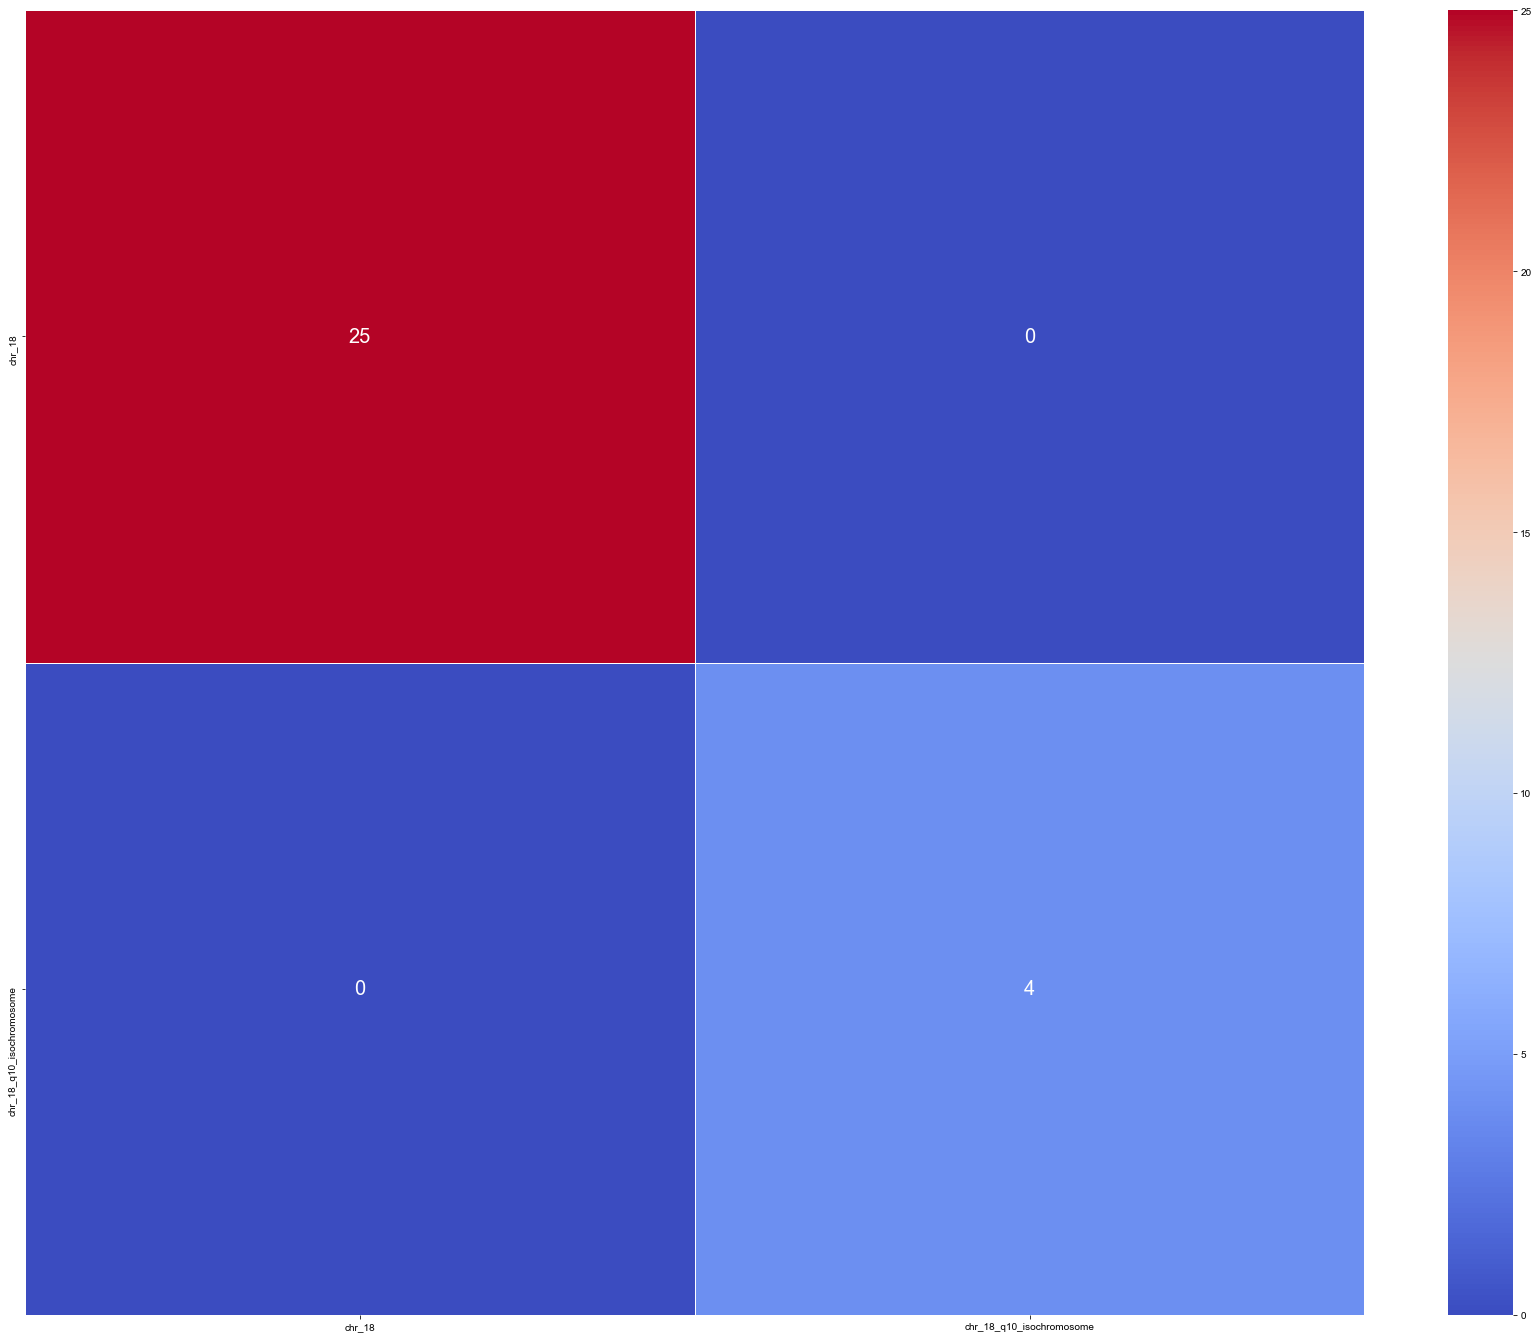

In [53]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [54]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_18_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [55]:
y_predict

array([[9.99991298e-01, 1.18602175e-05],
       [9.88657176e-01, 1.50954109e-02],
       [9.99999523e-01, 3.14270324e-07],
       [9.99948144e-01, 2.96899543e-05],
       [1.00000000e+00, 1.06758559e-14],
       [9.98167038e-01, 1.74849899e-03],
       [9.96910989e-01, 2.58325948e-03],
       [1.00000000e+00, 2.06351078e-08],
       [9.99999642e-01, 2.18317211e-07],
       [9.99983668e-01, 2.98642226e-05],
       [1.00000000e+00, 1.67740708e-07],
       [1.00000000e+00, 1.09544217e-07],
       [9.98740494e-01, 1.18747784e-03],
       [9.99958992e-01, 5.88166440e-05],
       [9.99996185e-01, 8.19523575e-06],
       [9.97782290e-01, 2.97505362e-03],
       [9.99984384e-01, 2.81845478e-05],
       [9.99909163e-01, 1.59144518e-04],
       [9.99994636e-01, 8.16230477e-06],
       [1.00000000e+00, 5.09594589e-10],
       [9.99997616e-01, 4.11095652e-06],
       [9.99997497e-01, 4.79507617e-06],
       [9.97775257e-01, 4.02400084e-03],
       [9.99816835e-01, 2.87092378e-04],
       [9.998388

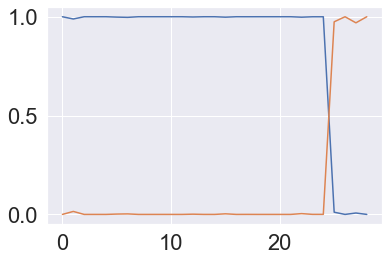

In [56]:
plt.plot(y_predict)

In [57]:
y_predict_1D = y_predict[:,0]

In [58]:
y_predict_1D_processed = 1- y_predict_1D

In [59]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [60]:
auc_rf

1.0

In [61]:
x = y = np.arange(0,1.1,0.1)

In [62]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

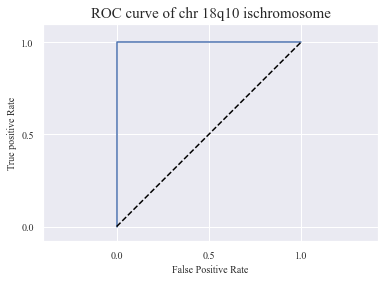

In [63]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of chr 18q10 ischromosome', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_18_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [64]:
auc_value = auc(fpr, tpr)

In [65]:
print('AUC is ', auc_value)

AUC is  1.0


# Results

In [66]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


In [67]:
print(performanceReport)

                          precision    recall  f1-score   support

                  chr_18       1.00      1.00      1.00        25
chr_18_q10_isochromosome       1.00      1.00      1.00         4

               micro avg       1.00      1.00      1.00        29
               macro avg       1.00      1.00      1.00        29
            weighted avg       1.00      1.00      1.00        29



In [68]:
type(performanceReport)

str

In [69]:
confusion

,chr_18,chr_18_q10_isochromosome
chr_18,25,0
chr_18_q10_isochromosome,0,4


In [70]:
print('AUC is ', auc_value)

AUC is  1.0


## Export to a text file

In [71]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()